In [1]:
import os, importlib, sys, time

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import scipy.linalg as la
import scipy.stats as stats
import scipy.optimize as opt

In [4]:
import freqepid

# 1. parameters

In [5]:
T = 60
T0 = 40

In [6]:
GPi = np.load('data/GPi.npz')

## observation parameters

In [7]:
alpha = 0.01
r_Y = 10

$$Y_t = NegBinom( \frac{EY_t}{r_Y + EY_t}, r_Y )$$

$$ EY_t = \alpha\sum_{s=1}^{t-1} I_s \pi_{t-s} $$

## latent parameters

In [8]:
d = 2
beta = np.array([0.5, -2.7])

In [9]:
r_I = 100
K = 6.5

$$I_t = NegBinom( \frac{EI_t}{r_I + EI_t}, r_I )$$

$$ EI_t = R(\bar{A}_t, \beta) \sum_{s=1}^{t-1} I_s g_{t-s} $$

$$R(\bar{A}_t, \beta) = \frac{K}{1+\exp(- \beta^\top A_t)}$$

## seed values

In [10]:
mu = np.log(100)

$$I_{[-T_0,0)} = \exp(\mu_0)$$

# 2. simulation

In [11]:
num_sim = 1000

## load simulation

In [12]:
data = pd.read_feather('data/simulation_randinf_2.feather')

In [13]:
data

,sim,date,R,EI,infection,EY,death,intervention
0,0,0,4.045986,404.595779,441.0,0.956069,1,0
1,0,1,4.045986,429.880919,530.0,0.962544,2,0
2,0,2,4.045986,528.356785,533.0,0.968322,0,0
3,0,3,4.045986,693.167715,715.0,0.973949,3,0
4,0,4,4.045986,906.581202,952.0,0.981001,5,0
...,...,...,...,...,...,...,...,...
59995,999,55,0.648378,402.686550,427.0,17.516285,11,1
59996,999,56,0.648378,379.787070,390.0,16.607593,8,1
59997,999,57,0.648378,358.160166,355.0,15.732875,8,1
59998,999,58,0.648378,338.050643,308.0,14.890695,10,1


# 3. Fit

In [14]:
model = freqepid.Model(GPi['g'], GPi['pi'], alpha, K, T0, "nbinom")

In [15]:
nsim = np.zeros(num_sim)
msim = np.zeros(num_sim)
bsim = np.zeros((num_sim,d))

In [16]:
for iter_sim in np.arange(num_sim):
    start_sim = time.time()
    
    data_i = data[data['sim']==iter_sim]
    A = np.stack([np.full(T, 1), data_i["intervention"].to_numpy()], -1)
    Y = data_i["death"].to_numpy()
    
    # fit
    nmle, mmle, bmle, ll =\
    model.fit(A, Y, n_iter=500, step_size=1,
              history=False, verbose=False)
    
    nsim[iter_sim] = nmle
    msim[iter_sim] = mmle
    bsim[iter_sim,:] = bmle
    
    sys.__stdout__.write("%d-th simulation finished, %f sec.\n"
                         %(iter_sim+1, time.time()-start_sim))
    sys.__stdout__.flush()

/Users/blueconet/mambaforge/envs/freqepid/lib/python3.10/site-packages/freqepid/model.py:140: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  bhaty = np.linalg.lstsq(Xy, Yy)[0]


1-th simulation finished, 2.995095 sec.
2-th simulation finished, 2.871347 sec.
3-th simulation finished, 2.767687 sec.
4-th simulation finished, 2.882564 sec.
5-th simulation finished, 2.746712 sec.
6-th simulation finished, 2.757442 sec.
7-th simulation finished, 3.367276 sec.
8-th simulation finished, 2.847843 sec.
9-th simulation finished, 2.946578 sec.
10-th simulation finished, 2.925280 sec.
11-th simulation finished, 2.871612 sec.
12-th simulation finished, 2.794829 sec.
13-th simulation finished, 2.651752 sec.
14-th simulation finished, 2.647539 sec.
15-th simulation finished, 2.836020 sec.
16-th simulation finished, 2.738990 sec.
17-th simulation finished, 2.793155 sec.
18-th simulation finished, 3.271459 sec.
19-th simulation finished, 3.093288 sec.
20-th simulation finished, 3.028573 sec.
21-th simulation finished, 2.972207 sec.
22-th simulation finished, 3.121573 sec.
23-th simulation finished, 2.973519 sec.
24-th simulation finished, 3.412670 sec.
25-th simulation finished

199-th simulation finished, 2.987921 sec.
200-th simulation finished, 2.935912 sec.
201-th simulation finished, 3.024798 sec.
202-th simulation finished, 3.250324 sec.
203-th simulation finished, 2.877659 sec.
204-th simulation finished, 3.009273 sec.
205-th simulation finished, 3.505360 sec.
206-th simulation finished, 2.827518 sec.
207-th simulation finished, 3.192582 sec.
208-th simulation finished, 2.907376 sec.
209-th simulation finished, 3.105926 sec.
210-th simulation finished, 3.065708 sec.
211-th simulation finished, 3.013241 sec.
212-th simulation finished, 2.941910 sec.
213-th simulation finished, 3.145863 sec.
214-th simulation finished, 2.867645 sec.
215-th simulation finished, 3.046069 sec.
216-th simulation finished, 2.987011 sec.
217-th simulation finished, 3.481377 sec.
218-th simulation finished, 2.936998 sec.
219-th simulation finished, 2.874820 sec.
220-th simulation finished, 2.869923 sec.
221-th simulation finished, 2.874075 sec.
222-th simulation finished, 2.9616

395-th simulation finished, 3.303217 sec.
396-th simulation finished, 2.972505 sec.
397-th simulation finished, 3.288072 sec.
398-th simulation finished, 3.478889 sec.
399-th simulation finished, 2.973774 sec.
400-th simulation finished, 2.889683 sec.
401-th simulation finished, 2.892909 sec.
402-th simulation finished, 3.055364 sec.
403-th simulation finished, 3.113960 sec.
404-th simulation finished, 3.341144 sec.
405-th simulation finished, 2.944773 sec.
406-th simulation finished, 2.979842 sec.
407-th simulation finished, 3.149952 sec.
408-th simulation finished, 2.731983 sec.
409-th simulation finished, 3.139361 sec.
410-th simulation finished, 2.974292 sec.
411-th simulation finished, 3.676677 sec.
412-th simulation finished, 3.062418 sec.
413-th simulation finished, 3.132031 sec.
414-th simulation finished, 3.031736 sec.
415-th simulation finished, 2.832138 sec.
416-th simulation finished, 2.956395 sec.
417-th simulation finished, 3.088439 sec.
418-th simulation finished, 3.1317

591-th simulation finished, 3.369453 sec.
592-th simulation finished, 3.175472 sec.
593-th simulation finished, 3.563528 sec.
594-th simulation finished, 3.207292 sec.
595-th simulation finished, 3.528690 sec.
596-th simulation finished, 3.637048 sec.
597-th simulation finished, 3.133298 sec.
598-th simulation finished, 3.040947 sec.
599-th simulation finished, 3.769283 sec.
600-th simulation finished, 3.468598 sec.
601-th simulation finished, 3.510311 sec.
602-th simulation finished, 2.930169 sec.
603-th simulation finished, 2.896913 sec.
604-th simulation finished, 3.466551 sec.
605-th simulation finished, 3.617317 sec.
606-th simulation finished, 3.515377 sec.
607-th simulation finished, 3.151084 sec.
608-th simulation finished, 3.272413 sec.
609-th simulation finished, 3.605180 sec.
610-th simulation finished, 2.880883 sec.
611-th simulation finished, 3.208891 sec.
612-th simulation finished, 3.214295 sec.
613-th simulation finished, 3.637500 sec.
614-th simulation finished, 3.4621

787-th simulation finished, 4.130803 sec.
788-th simulation finished, 4.379550 sec.
789-th simulation finished, 4.224492 sec.
790-th simulation finished, 4.081295 sec.
791-th simulation finished, 4.590386 sec.
792-th simulation finished, 4.086669 sec.
793-th simulation finished, 4.490017 sec.
794-th simulation finished, 3.930248 sec.
795-th simulation finished, 4.701014 sec.
796-th simulation finished, 4.178729 sec.
797-th simulation finished, 4.024445 sec.
798-th simulation finished, 4.315189 sec.
799-th simulation finished, 3.924821 sec.
800-th simulation finished, 4.686584 sec.
801-th simulation finished, 4.139710 sec.
802-th simulation finished, 4.354275 sec.
803-th simulation finished, 4.051431 sec.
804-th simulation finished, 4.100304 sec.
805-th simulation finished, 4.239376 sec.
806-th simulation finished, 4.477124 sec.
807-th simulation finished, 4.148058 sec.
808-th simulation finished, 4.505907 sec.
809-th simulation finished, 4.426037 sec.
810-th simulation finished, 4.1934

983-th simulation finished, 3.771183 sec.
984-th simulation finished, 3.729500 sec.
985-th simulation finished, 3.446627 sec.
986-th simulation finished, 3.512087 sec.
987-th simulation finished, 4.065545 sec.
988-th simulation finished, 3.524010 sec.
989-th simulation finished, 3.508573 sec.
990-th simulation finished, 3.929646 sec.
991-th simulation finished, 3.585961 sec.
992-th simulation finished, 3.489581 sec.
993-th simulation finished, 3.276664 sec.
994-th simulation finished, 4.180275 sec.
995-th simulation finished, 3.682970 sec.
996-th simulation finished, 3.735424 sec.
997-th simulation finished, 3.417218 sec.
998-th simulation finished, 3.628772 sec.
999-th simulation finished, 4.122730 sec.
1000-th simulation finished, 3.807850 sec.


In [17]:
np.savez('coverage_freqepid_nbinom_randinf_2.npz',
         nsim = nsim, msim = msim, bsim = bsim)

# 4. Wald's Confidence Region Coverage Test

In [20]:
# locals.update(np.load('coverage_freqepid_nbinom_randinf_2.npz'))

In [18]:
Ihs_dth = np.zeros([num_sim, 2+d, 2+d])
Ts_dth = np.zeros(num_sim)
ps_dth = np.zeros(num_sim)

In [19]:
Ihs_hac = np.zeros([num_sim, 2+d, 2+d])
Ts_hac = np.zeros(num_sim)
ps_hac = np.zeros(num_sim)

In [20]:
Ihs_sdw = np.zeros([num_sim, 2+d, 2+d])
Ts_sdw = np.zeros(num_sim)
ps_sdw = np.zeros(num_sim)

In [21]:
for iter_sim in np.arange(num_sim):
    start_sim = time.time()
    
    nmle = nsim[iter_sim]
    mmle = msim[iter_sim]
    bmle = bsim[iter_sim,:]
    
    data_i = data[data['sim']==iter_sim]
    A = np.stack([np.full(T, 1), data_i["intervention"].to_numpy()], -1)
    Y = data_i["death"].to_numpy()
    
    Ihat_dth, Ihat_hac, Ihat_sdw =\
    model.inference(A, Y, nmle, mmle, bmle)
    
    # Fisher information matrix
    Ihs_dth[iter_sim] = Ihat_dth
    Ts_dth[iter_sim] = (bmle[1]-beta[1])/np.sqrt(la.pinv(Ihs_dth[iter_sim])[-1,-1])
    ps_dth[iter_sim] = 2*(1-stats.norm.cdf(np.abs(Ts_dth[iter_sim])))
    
    # HAC estimator
    Ihs_hac[iter_sim] = Ihat_hac
    Ts_hac[iter_sim] = (bmle[1]-beta[1])/np.sqrt(la.pinv(Ihs_hac[iter_sim])[-1,-1])
    ps_hac[iter_sim] = 2*(1-stats.norm.cdf(np.abs(Ts_hac[iter_sim])))
    
    # Sandwich estimator
    Ihs_sdw[iter_sim] = Ihat_sdw
    Ts_sdw[iter_sim] = (bmle[1]-beta[1])/np.sqrt(la.pinv(Ihs_sdw[iter_sim])[-1,-1])
    ps_sdw[iter_sim] = 2*(1-stats.norm.cdf(np.abs(Ts_sdw[iter_sim])))
    
    sys.__stdout__.write("%d-th simulation finished, %f sec.\n"
                         %(iter_sim+1, time.time()-start_sim))
    sys.__stdout__.flush()

1-th simulation finished, 0.005546 sec.
2-th simulation finished, 0.003206 sec.
3-th simulation finished, 0.001812 sec.
4-th simulation finished, 0.001725 sec.
5-th simulation finished, 0.001474 sec.
6-th simulation finished, 0.001428 sec.
7-th simulation finished, 0.001319 sec.
8-th simulation finished, 0.001263 sec.
9-th simulation finished, 0.003437 sec.
10-th simulation finished, 0.002379 sec.
11-th simulation finished, 0.001493 sec.
12-th simulation finished, 0.003471 sec.
13-th simulation finished, 0.002948 sec.
14-th simulation finished, 0.002860 sec.
15-th simulation finished, 0.001712 sec.
16-th simulation finished, 0.001369 sec.
17-th simulation finished, 0.003627 sec.
18-th simulation finished, 0.001662 sec.
19-th simulation finished, 0.001632 sec.
20-th simulation finished, 0.001368 sec.
21-th simulation finished, 0.001299 sec.
22-th simulation finished, 0.001783 sec.
23-th simulation finished, 0.001337 sec.
24-th simulation finished, 0.001220 sec.
25-th simulation finished

250-th simulation finished, 0.001986 sec.
251-th simulation finished, 0.001316 sec.
252-th simulation finished, 0.006823 sec.
253-th simulation finished, 0.001281 sec.
254-th simulation finished, 0.001359 sec.
255-th simulation finished, 0.005000 sec.
256-th simulation finished, 0.001315 sec.
257-th simulation finished, 0.001334 sec.
258-th simulation finished, 0.001386 sec.
259-th simulation finished, 0.001519 sec.
260-th simulation finished, 0.001350 sec.
261-th simulation finished, 0.001380 sec.
262-th simulation finished, 0.001385 sec.
263-th simulation finished, 0.001416 sec.
264-th simulation finished, 0.001340 sec.
265-th simulation finished, 0.001218 sec.
266-th simulation finished, 0.001237 sec.
267-th simulation finished, 0.001200 sec.
268-th simulation finished, 0.001314 sec.
269-th simulation finished, 0.001310 sec.
270-th simulation finished, 0.004748 sec.
271-th simulation finished, 0.001326 sec.
272-th simulation finished, 0.001222 sec.
273-th simulation finished, 0.0013

472-th simulation finished, 0.001358 sec.
473-th simulation finished, 0.001214 sec.
474-th simulation finished, 0.001222 sec.
475-th simulation finished, 0.001165 sec.
476-th simulation finished, 0.001190 sec.
477-th simulation finished, 0.001160 sec.
478-th simulation finished, 0.001201 sec.
479-th simulation finished, 0.001165 sec.
480-th simulation finished, 0.001191 sec.
481-th simulation finished, 0.005587 sec.
482-th simulation finished, 0.003036 sec.
483-th simulation finished, 0.002937 sec.
484-th simulation finished, 0.002659 sec.
485-th simulation finished, 0.001277 sec.
486-th simulation finished, 0.003967 sec.
487-th simulation finished, 0.003148 sec.
488-th simulation finished, 0.002039 sec.
489-th simulation finished, 0.013030 sec.
490-th simulation finished, 0.001336 sec.
491-th simulation finished, 0.001196 sec.
492-th simulation finished, 0.001211 sec.
493-th simulation finished, 0.001177 sec.
494-th simulation finished, 0.004944 sec.
495-th simulation finished, 0.0027

725-th simulation finished, 0.004356 sec.
726-th simulation finished, 0.001949 sec.
727-th simulation finished, 0.003367 sec.
728-th simulation finished, 0.002891 sec.
729-th simulation finished, 0.001395 sec.
730-th simulation finished, 0.001267 sec.
731-th simulation finished, 0.001398 sec.
732-th simulation finished, 0.001377 sec.
733-th simulation finished, 0.001308 sec.
734-th simulation finished, 0.002431 sec.
735-th simulation finished, 0.001456 sec.
736-th simulation finished, 0.003215 sec.
737-th simulation finished, 0.002869 sec.
738-th simulation finished, 0.002842 sec.
739-th simulation finished, 0.001650 sec.
740-th simulation finished, 0.001293 sec.
741-th simulation finished, 0.007950 sec.
742-th simulation finished, 0.001319 sec.
743-th simulation finished, 0.001337 sec.
744-th simulation finished, 0.001319 sec.
745-th simulation finished, 0.001221 sec.
746-th simulation finished, 0.001282 sec.
747-th simulation finished, 0.010282 sec.
748-th simulation finished, 0.0013

980-th simulation finished, 0.001988 sec.
981-th simulation finished, 0.013898 sec.
982-th simulation finished, 0.001607 sec.
983-th simulation finished, 0.001312 sec.
984-th simulation finished, 0.001362 sec.
985-th simulation finished, 0.003641 sec.
986-th simulation finished, 0.002493 sec.
987-th simulation finished, 0.002873 sec.
988-th simulation finished, 0.001572 sec.
989-th simulation finished, 0.001321 sec.
990-th simulation finished, 0.001856 sec.
991-th simulation finished, 0.001329 sec.
992-th simulation finished, 0.001327 sec.
993-th simulation finished, 0.003025 sec.
994-th simulation finished, 0.001427 sec.
995-th simulation finished, 0.001271 sec.
996-th simulation finished, 0.003249 sec.
997-th simulation finished, 0.002932 sec.
998-th simulation finished, 0.002822 sec.
999-th simulation finished, 0.001561 sec.
1000-th simulation finished, 0.001338 sec.


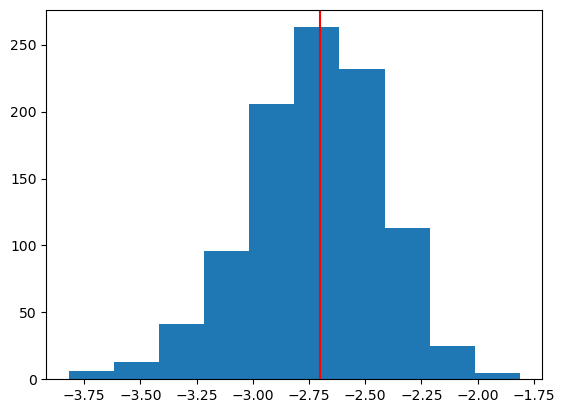

In [22]:
plt.hist(bsim[:,1])
plt.axvline(beta[1], color='red')

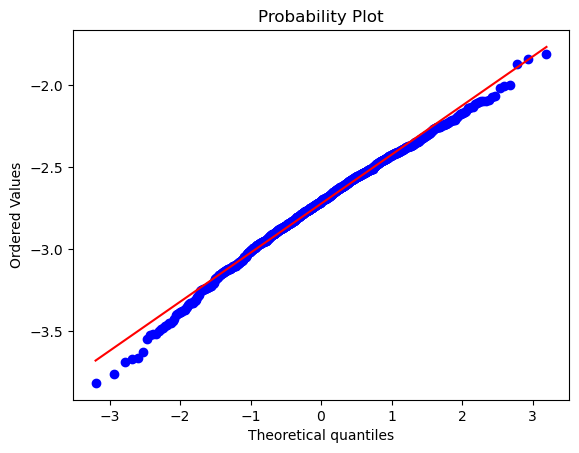

In [23]:
stats.probplot(bsim[:,1], dist = 'norm', plot=plt, fit=True)
# plt.plot([0, 1], [0, 1], color='black')
plt.show()

(array([ 40., 154., 271., 241., 188.,  66.,  27.,  11.,   1.,   1.]),
 array([-2.33053498, -1.59680967, -0.86308436, -0.12935905,  0.60436626,
         1.33809157,  2.07181689,  2.8055422 ,  3.53926751,  4.27299282,
         5.00671813]),
 <BarContainer object of 10 artists>)

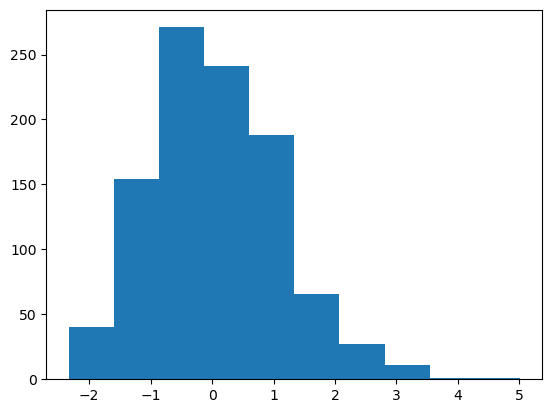

In [24]:
plt.hist(Ts_dth)

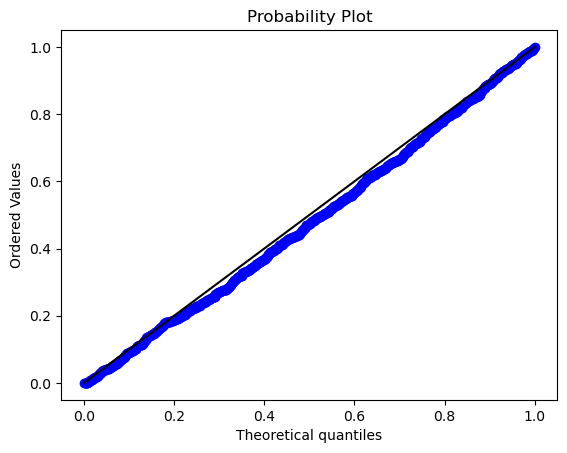

In [25]:
stats.probplot(ps_dth, dist = 'uniform', plot=plt, fit=False)
plt.plot([0, 1], [0, 1], color='black')
plt.show()

In [26]:
np.mean(np.abs(ps_dth) > 0.05)

0.937

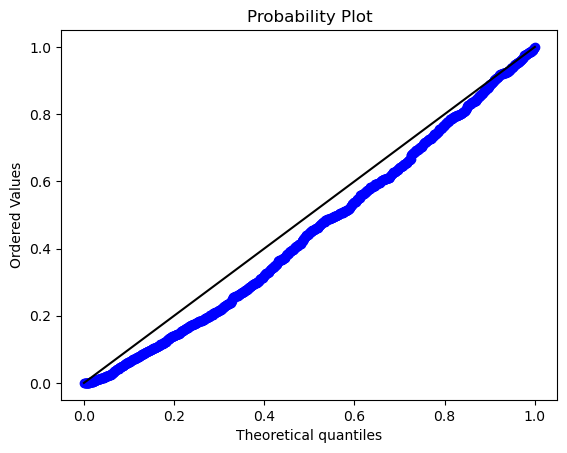

In [27]:
stats.probplot(ps_sdw, dist = 'uniform', plot=plt, fit=False)
plt.plot([0, 1], [0, 1], color='black')
plt.show()

In [28]:
np.mean(np.abs(ps_sdw) > 0.05)

0.914